# Lab 05 - Bài tập

In [1]:
# Import các thư viện thông dụng
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import các distribution packages từ thư viện scipy
from scipy.stats import binom
from scipy.stats import poisson
from scipy.stats import norm
from scipy.stats import t
from scipy.stats import iqr

**Bài 01:** Một bài thi trắc nghiệm gồm 10 câu hỏi, mỗi câu có 4 phương án trả lời trong đó chỉ có một phương án đúng. Bạn hãy: 

a. Một sinh viên không học bài làm bài bằng cách chọn ngẫu nhiên một phương án cho mỗi câu hỏi. Bạn hãy dùng hàm random để in ra số câu đúng của bạn sinh viên trong 10 lần kiểm tra.


In [2]:
# Mỗi câu có 4 phương án trả lời và chỉ có 1 phương án đúng → xác suất để trả lời đúng 1 câu là 1/4.

# Mỗi bài trắc nghiệm gồm 10 câu hỏi → Có hữu hạn số lần thư

# Với xác suất đúng là 1/4 mỗi câu → Xác suất biến cố xảy ra là bằng nhau cho mỗi lần thử.

# Kết quả mỗi câu hoặc là đúng hoặc là sai → kết quả chia thành 2 lớp.

# Kết quả của lượt trước không ảnh hưởng đến câu sau → các kết quả phép thử là độc lập.

# Vậy gọi X là số câu đúng, khi đó X ~ B(10, 1/4) với n là số lần thử và p là xác suất đúng 1/4.

n, p = 10, 0.25

In [3]:
x = np.random.binomial(n, p, 10)
df = pd.DataFrame({
  "Số lần thử": range(1, len(x) + 1),
  "Số câu đúng": x
})
df

,Số lần thử,Số câu đúng
0,1,2
1,2,3
2,3,3
3,4,1
4,5,2
5,6,4
6,7,0
7,8,3
8,9,5
9,10,4


b. Giả sử mỗi câu đúng được 4 điểm, mỗi câu sai bị trừ 2 điểm. Tính xác suất để sinh viên này được 4 điểm


 Công thức điểm: Y = 4*X + (-2)*(10 - X) = 6*X - 20
 
 Để Y = 4, ta có 6*X - 20 = 4 => X = 4

In [4]:
prob = binom.pmf(4, n, p)
print("Xác suất để được 4 điểm:", prob * 100)

Xác suất để được 4 điểm: 14.599800109863272


c. Gọi X là số câu trả lời đúng. Tính E(X) và Var(X)

In [5]:
Ex = n * p
Varx = n * p * (1 - p)

print("E(x):", Ex)
print("Varx:", Varx)

E(x): 2.5
Varx: 1.875


**Bài 02:** Một trung tâm bưu điện nhận được 3 cuộc gọi điện thoại mỗi phút. Tính xác suất để trung tâm nhận được 1 cuộc gọi, 2 cuộc gọi, 3 cuộc gọi trong vòng một phút biết số cuộc gọi trong một phút có phân phối Poisson.

In [6]:
lam = 3

p1 = poisson.pmf(1, lam)
p2 = poisson.pmf(2, lam)
p3 = poisson.pmf(3, lam)

print("P(X = 1):", p1)
print("P(X = 2):", p2)
print("P(X = 3):", p3)

df = pd.DataFrame({
    "Số cuộc gọi": [1, 2, 3],
    "Xác suất": [p1, p2, p3]
})
print(df)

P(X = 1): 0.14936120510359185
P(X = 2): 0.22404180765538775
P(X = 3): 0.22404180765538775
   Số cuộc gọi  Xác suất
0            1  0.149361
1            2  0.224042
2            3  0.224042


**Bài 03:** Trọng lượng (đơn vị gam) của một loại trái cây có phân phối chuẩn với µ = 500 (gam) gam và $σ^2 = 16 (gam^2)$. Trái cây thu hoạch được phân loại theo trọng lượng như sau:

Loại 1: trên 505 gam

Loại 2: từ 495 – 505 gam

Loại 3: dười 495 gam

a. Hãy tính tỷ lệ của mỗi loại.

In [7]:
# Tham số của dân số
mu = 500       # trung bình = 500 gam
sigma = 4      # độ lệch chuẩn = 4 gam

# Loại 3: dưới 495 gam
p_loai3 = norm.cdf(495, loc=mu, scale=sigma)
# Loại 1: trên 505 gam
p_loai1 = 1 - norm.cdf(505, loc=mu, scale=sigma)
# Loại 2: từ 495 đến 505 gam
p_loai2 = norm.cdf(505, loc=mu, scale=sigma) - norm.cdf(495, loc=mu, scale=sigma)

print("Tỷ lệ Loại 1 (trên 505 gam):", p_loai1 * 100)
print("Tỷ lệ Loại 2 (495 - 505 gam):", p_loai2 * 100)
print("Tỷ lệ Loại 3 (dưới 495 gam):", p_loai3 * 100)

Tỷ lệ Loại 1 (trên 505 gam): 10.564977366685536
Tỷ lệ Loại 2 (495 - 505 gam): 78.87004526662894
Tỷ lệ Loại 3 (dưới 495 gam): 10.564977366685536


b. Bạn hãy mô phỏng lấy mẫu  20 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu


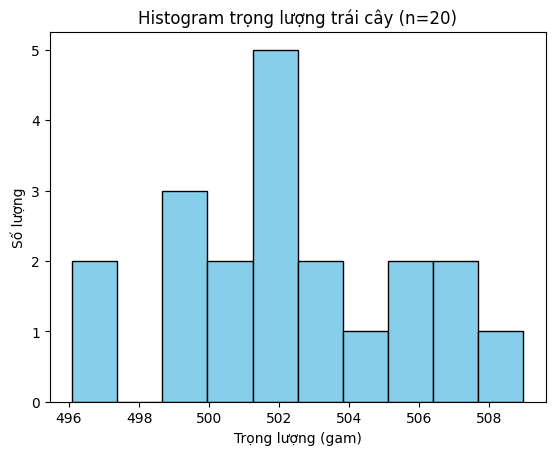

Mẫu 20 trái cây: trung bình = 502.27733837178255 , độ lệch chuẩn = 3.4007312015978597


In [8]:
np.random.seed(0) 
sample_20 = np.random.normal(mu, sigma, 20)
mean_20 = np.mean(sample_20)
std_20 = np.std(sample_20)  

plt.hist(sample_20, bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Trọng lượng (gam)")
plt.ylabel("Số lượng")
plt.title("Histogram trọng lượng trái cây (n=20)")
plt.show()

print("Mẫu 20 trái cây: trung bình =", mean_20, ", độ lệch chuẩn =", std_20)


c. Bạn hãy mô phỏng lấy 100 trái cây trên. Bạn hãy vẽ histogram trọng lượng trái cây và tính giá trị trung bình và độ lệch chuẩn trái cây từ mẫu


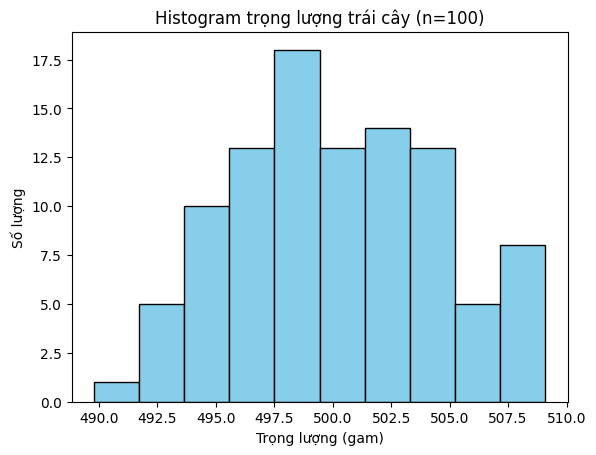

Mẫu 100 trái cây: trung bình = 500.1810687069823 , độ lệch chuẩn = 4.2554708667241465


In [9]:
sample_100 = np.random.normal(mu, sigma, 100)
mean_100 = np.mean(sample_100)
std_100 = np.std(sample_100, ddof=1)

# Vẽ histogram cho mẫu 100 trái cây
plt.hist(sample_100, bins=10, color="skyblue", edgecolor="black")
plt.xlabel("Trọng lượng (gam)")
plt.ylabel("Số lượng")
plt.title("Histogram trọng lượng trái cây (n=100)")
plt.show()

print("Mẫu 100 trái cây: trung bình =", mean_100, ", độ lệch chuẩn =", std_100)


d. Từ hai cách lấy mẫu ở câu b, c bạn có nhận xét gì không?

In [10]:
print("\nNhận xét: Với mẫu n=100, trung bình và độ lệch chuẩn mẫu gần với giá trị thực của dân số (500 gam và 4 gam) hơn so với mẫu n=20.")



Nhận xét: Với mẫu n=100, trung bình và độ lệch chuẩn mẫu gần với giá trị thực của dân số (500 gam và 4 gam) hơn so với mẫu n=20.


**Bài 04:** Mô phỏng tung một con xúc sắc cân đối đồng chất 5000 lần. Dựa vào giá trị mô phỏng, bạn hãy tìm các giá trị xác suất dưới đây:

**Bài 05:** Tạo 5000 số ngẫu nhiên có phân phối nhị thức với n=50, p=0.7 Bạn Hãy

In [11]:
n, p = 50, 0.7
np.random.seed(0)  # Để kết quả có thể tái lập
data = np.random.binomial(n, p, 5000)
s = pd.Series(data)

a. Tìm các giá trị thống kê: min, max, Q1, Q2, Q3


In [12]:
min_val = s.min()
max_val = s.max()
Q1 = s.quantile(0.25)
Q2 = s.quantile(0.50)
Q3 = s.quantile(0.75)

print("Min:", min_val)
print("Max:", max_val)
print("Q1:", Q1)
print("Q2:", Q2)
print("Q3:", Q3)

Min: 21
Max: 46
Q1: 33.0
Q2: 35.0
Q3: 37.0


b. Vẽ đồ thị boxplot

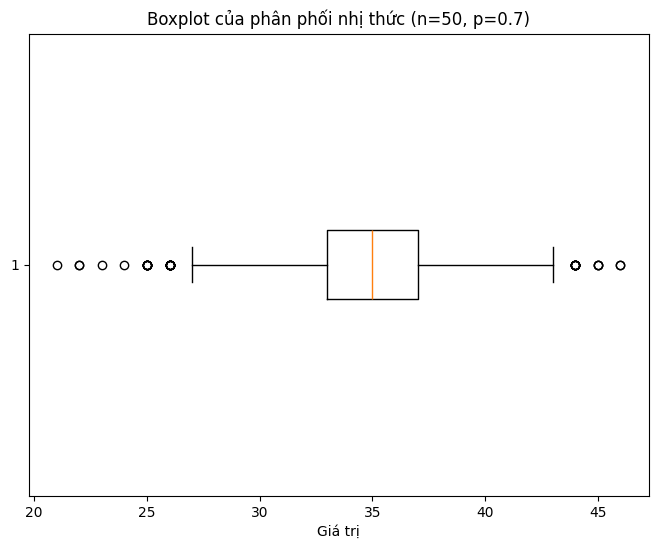

In [13]:
plt.figure(figsize=(8, 6))
plt.boxplot(s, vert=False)
plt.title("Boxplot của phân phối nhị thức (n=50, p=0.7)")
plt.xlabel("Giá trị")
plt.show()


c. Vẽ các đồ thị: tần số, tần suất

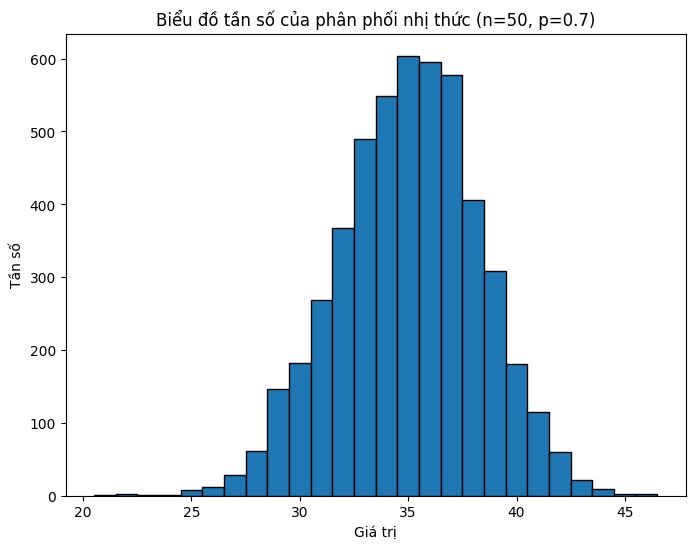

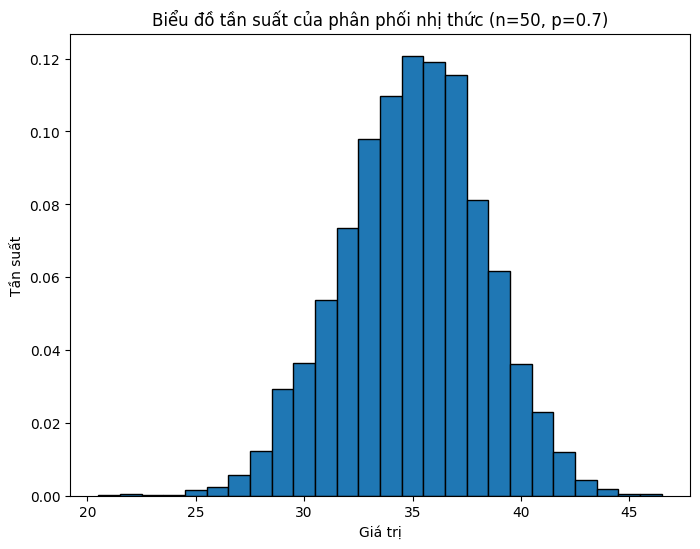

In [14]:
# Vẽ biểu đồ tần số (frequency histogram)
plt.figure(figsize=(8, 6))
plt.hist(s, bins=range(min_val, max_val+2), edgecolor='black', align='left')
plt.title("Biểu đồ tần số của phân phối nhị thức (n=50, p=0.7)")
plt.xlabel("Giá trị")
plt.ylabel("Tần số")
plt.show()

# Vẽ biểu đồ tần suất (relative frequency - normalized histogram)
plt.figure(figsize=(8, 6))
plt.hist(s, bins=range(min_val, max_val+2), edgecolor='black', align='left', density=True)
plt.title("Biểu đồ tần suất của phân phối nhị thức (n=50, p=0.7)")
plt.xlabel("Giá trị")
plt.ylabel("Tần suất")
plt.show()

**Bài 6**

Giả sử X là biến ngẫu nhiên rời rạc



a. Hãy cho biết ý nghĩa câu lệnh sau: `binom.pmf(4, 10, 0.6)`

binom là phân phối nhị thức

pmf là hàm mật độ cho phân phối liên tục

xác xuất để x =4 với n = 10, p = 0.6

b. Giả sử X có phân phối nhị thức `X ~ B(10, 0.6)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

In [15]:
n, p = 10, 0.6

p_le_5 = binom.cdf(5, n, p)  # P(X ≤ 5)
p_lt_5 = binom.cdf(4, n, p)  # P(X < 5) = P(X ≤ 4)
p_ge_4 = 1 - binom.cdf(3, n, p)  # P(X ≥ 4)
p_eq_5 = binom.pmf(5, n, p)  # P(X = 5)

print("P(X ≤ 5) =", p_le_5)
print("P(X < 5) =", p_lt_5)
print("P(X ≥ 4) =", p_ge_4)
print("P(X = 5) =", p_eq_5)

P(X ≤ 5) = 0.36689674240000025
P(X < 5) = 0.16623861760000014
P(X ≥ 4) = 0.9452381183999999
P(X = 5) = 0.2006581248


c. Hãy cho biết ý nghĩa câu lệnh sau: `poisson.pmf(4, 3)`

poissonà phân phối possion

pmdf tính phân phối rời rạc

tính x = 4 với k = 3

d. Giả sử X có phân phối Poisson `X ~ P(3)`. Hãy tính các giá trị sau:  
$P(X \leq 5), P(X \le 5), P(X \ge 4), P(X = 5) $

In [16]:
lam = 3  # lambda = 3

p_lt_5 = poisson.cdf(4, lam)        # P(X < 5) = P(X <= 4)
p_le_5 = poisson.cdf(5, lam)        # P(X <= 5)
p_ge_4 = 1 - poisson.cdf(3, lam)    # P(X >= 4)
p_eq_5 = poisson.pmf(5, lam)        # P(X = 5)

print("P(X < 5)  =", p_lt_5)
print("P(X <= 5) =", p_le_5)
print("P(X >= 4) =", p_ge_4)
print("P(X = 5)  =", p_eq_5)

P(X < 5)  = 0.8152632445237722
P(X <= 5) = 0.9160820579686966
P(X >= 4) = 0.35276811121776874
P(X = 5)  = 0.10081881344492458


**Bài 7**

a. Cho biết ý nghĩa của các câu lệnh sau:

- `norm.cdf(2)`

- `norm.cdf(2, 1, 1)`

- `norm.cdf(2, 1, 2)`



norm.cfd(2) tính xác suất rằng một biến ngẫu nhiên Z. theo phân phối chuẩn tắc (nghĩa là trung bình bằng 0 và độ lệch chuẩn bằng 1), sẽ có giá trị nhỏ hơn hoặc bằng 2.

norm.cfd(2, 1, 1) tính xác suất rằng một biến ngẫu nhiên Z. theo phân phối chuẩn tắc (nghĩa là trung bình bằng 1 và độ lệch chuẩn bằng 1), sẽ có giá trị nhỏ hơn hoặc bằng 2.

norm.cfd(2, 1, 2) tính xác suất rằng một biến ngẫu nhiên Z. theo phân phối chuẩn tắc (nghĩa là trung bình bằng 1 và độ lệch chuẩn bằng 2), sẽ có giá trị nhỏ hơn hoặc bằng 2.

b. Cho biết kết quả của câu lệnh sau: `norm.ppf(norm.cdf(2))`



In [17]:
norm.ppf(norm.cdf(2))

np.float64(2.0000000000000004)

c. Tính các giá trị sau và vẽ hình minh họa cho các giá trị tính được:

- `norm.ppf(0.975)`

- `norm.ppf(0.975, 1, 1)`

- `norm.ppf(0.975, 1, 2)`



Phân vị 97.5% của N(0,1)  = 1.959963984540054
Phân vị 97.5% của N(1,1)  = 2.959963984540054
Phân vị 97.5% của N(1,2)  = 4.919927969080108


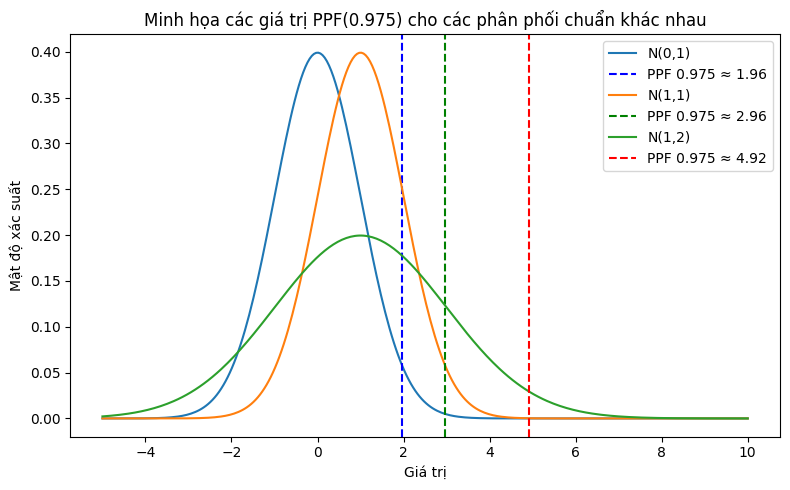

In [18]:
# Tính phân vị 97.5% (ppf) cho ba trường hợp
val1 = norm.ppf(0.975)                 # N(0, 1)
val2 = norm.ppf(0.975, loc=1, scale=1) # N(1, 1)
val3 = norm.ppf(0.975, loc=1, scale=2) # N(1, 2)

print("Phân vị 97.5% của N(0,1)  =", val1)
print("Phân vị 97.5% của N(1,1)  =", val2)
print("Phân vị 97.5% của N(1,2)  =", val3)

# Tạo dải giá trị x để vẽ hàm mật độ
x = np.linspace(-5, 10, 300)

pdf_std  = norm.pdf(x, 0, 1)
pdf_1_1  = norm.pdf(x, 1, 1)
pdf_1_2  = norm.pdf(x, 1, 2)

# Vẽ biểu đồ
plt.figure(figsize=(8, 5))

# Phân phối N(0,1)
plt.plot(x, pdf_std, label='N(0,1)')
plt.axvline(val1, color='blue', linestyle='--', 
            label=f'PPF 0.975 ≈ {val1:.2f}')

# Phân phối N(1,1)
plt.plot(x, pdf_1_1, label='N(1,1)')
plt.axvline(val2, color='green', linestyle='--', 
            label=f'PPF 0.975 ≈ {val2:.2f}')

# Phân phối N(1,2)
plt.plot(x, pdf_1_2, label='N(1,2)')
plt.axvline(val3, color='red', linestyle='--', 
            label=f'PPF 0.975 ≈ {val3:.2f}')

plt.xlabel("Giá trị")
plt.ylabel("Mật độ xác suất")
plt.title("Minh họa các giá trị PPF(0.975) cho các phân phối chuẩn khác nhau")
plt.legend()
plt.tight_layout()
plt.show()

d. Giả sử biến ngẫu nhiên X có phân phối chuẩn với kỳ vọng là 24 và phương sai là 16. Hãy tính các giá trị sau:

- $P(X \leq 20)$
- $P(X \ge 29.5)$
- $P(X = 23.8)$

In [19]:
# Thông số của X
mu = 24
sigma = 4  # vì phương sai = 16 => độ lệch chuẩn = 4

# 1) P(X <= 20)
p_le_20 = norm.cdf(20, loc=mu, scale=sigma)
print("P(X <= 20) =", p_le_20)

# 2) P(X > 29.5)
p_gt_29_5 = 1 - norm.cdf(29.5, loc=mu, scale=sigma)
print("P(X > 29.5) =", p_gt_29_5)

# 3) P(X = 23.8)
# Với phân phối liên tục, xác suất đúng một điểm bằng 0
p_eq_23_8 = 0
print("P(X = 23.8) =", p_eq_23_8, "(phân phối liên tục => xác suất = 0)")

P(X <= 20) = 0.15865525393145707
P(X > 29.5) = 0.08456572235133564
P(X = 23.8) = 0 (phân phối liên tục => xác suất = 0)


**Bài 8**

Một công ty sản xuất làm ra các chi tiết máy với độ dài các chi tiết có phân phối chuẩn với kỳ vọng là 3000 mm và độ lệch chuẩn là 3 mm. Yêu cầu cho các chi tiết máy này là phải có chiều dài từ 2993 mm đến 3007 mm. Tính tỷ lệ sản phẩm lỗi của công ty

In [20]:
mu = 3000
sigma = 3

# Tính P(X < 2993)
p_below_2993 = norm.cdf(2993, loc=mu, scale=sigma)

# Tính P(X > 3007) = 1 - P(X <= 3007)
p_above_3007 = 1 - norm.cdf(3007, loc=mu, scale=sigma)

# Tỷ lệ lỗi
p_loi = p_below_2993 + p_above_3007

print("Tỷ lệ sản phẩm lỗi:", p_loi)

Tỷ lệ sản phẩm lỗi: 0.01963065725729065


**Bài 9**

Giả sử điểm thi TOEIC là một biến ngẫu nhiên có phân phối chuẩn với kỳ vọng là 500, độ lệch chuẩn là 8. Bạn hãy:

a. Mô phỏng bằng cách phát sinh ngẫu nhiên điểm thi TOIEC của một nhóm gồm 50 người.



In [21]:
scores_50 = np.random.normal(500, 8, 50)
scores_50

array([488.62477092, 492.51192401, 498.42754204, 495.4000973 ,
       506.0038603 , 493.88478377, 492.26298343, 491.91563033,
       503.25325798, 503.86777381, 486.6204433 , 504.97660157,
       506.88778616, 486.47201791, 494.47654857, 511.43113939,
       508.04881365, 500.19834127, 504.00999517, 516.89615699,
       504.02237579, 490.23352911, 510.919512  , 493.03248888,
       507.95121789, 505.25016529, 507.11610842, 512.3274638 ,
       488.27268537, 499.44329156, 515.56839602, 507.81105396,
       501.4172667 , 491.81461496, 500.85376394, 492.70494961,
       488.25306435, 504.61182962, 500.52244484, 493.81189758,
       503.15958551, 495.9688809 , 514.23647267, 499.75542045,
       512.6167057 , 493.49758319, 504.90679332, 514.74959981,
       502.16872786, 509.09158102])

b. Tính điểm trung bình và độ lệch chuẩn về điểm của nhóm.



In [22]:
mean_50 = np.mean(scores_50)
std_50 = np.std(scores_50, ddof=1)
print("Trung bình =", mean_50)
print("Độ lệch chuẩn =", std_50)

Trung bình = 501.04519875971533
Độ lệch chuẩn = 8.372251845562118


c. Tìm miền giá trị, và miền phân vị (IQR) của nhóm



In [23]:
median_50 = np.median(scores_50)
iqr_50 = (scores_50)

print("Trung vị =", median_50)
print("IQR =", iqr_50)

Trung vị = 501.79299727822865
IQR = [488.62477092 492.51192401 498.42754204 495.4000973  506.0038603
 493.88478377 492.26298343 491.91563033 503.25325798 503.86777381
 486.6204433  504.97660157 506.88778616 486.47201791 494.47654857
 511.43113939 508.04881365 500.19834127 504.00999517 516.89615699
 504.02237579 490.23352911 510.919512   493.03248888 507.95121789
 505.25016529 507.11610842 512.3274638  488.27268537 499.44329156
 515.56839602 507.81105396 501.4172667  491.81461496 500.85376394
 492.70494961 488.25306435 504.61182962 500.52244484 493.81189758
 503.15958551 495.9688809  514.23647267 499.75542045 512.6167057
 493.49758319 504.90679332 514.74959981 502.16872786 509.09158102]


d. Cho biết tỷ lệ đạt trên 450 điểm của nhóm. 



In [24]:
p_above_450_50 = np.mean(scores_50 > 450)
print("Tỷ lệ > 450 =", p_above_450_50)

Tỷ lệ > 450 = 1.0


e. Vẽ đồ thị histogram của nhóm và so sánh với đồ thị hàm mật độ của phân phối chuẩn với kỳ vọng là 500 và độ lệch chuẩn là 8.



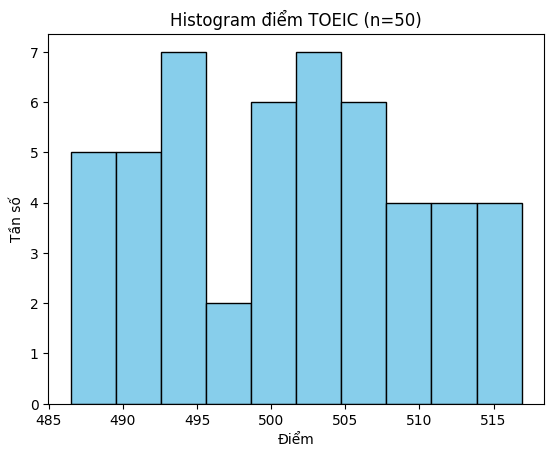

In [25]:
plt.hist(scores_50, bins=10, edgecolor='black', color='skyblue')
plt.title("Histogram điểm TOEIC (n=50)")
plt.xlabel("Điểm")
plt.ylabel("Tần số")
plt.show()


f. Thay vì mô phỏng 50 người, hãy mô phỏng nhóm với 100 người thi. Bạn có nhận xét gì?


Nhóm 100 người:
Trung bình = 498.90534951096356
Độ lệch chuẩn = 8.28993325394834
Trung vị = 499.26034572181004
IQR = 12.03499747893403
Tỷ lệ > 450 = 1.0


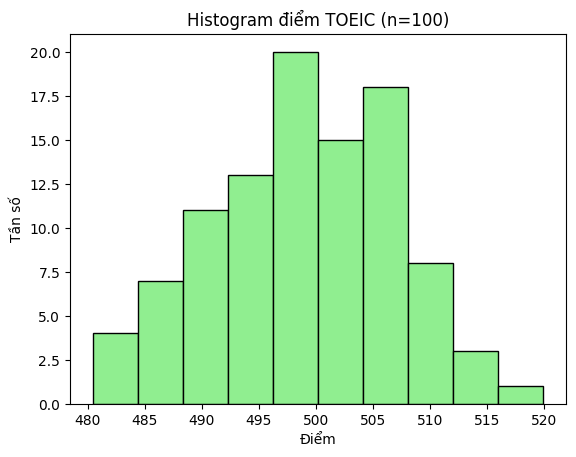

In [26]:
# Mô phỏng nhóm 100 người
scores_100 = np.random.normal(500, 8, 100)
mean_100 = np.mean(scores_100)
std_100 = np.std(scores_100, ddof=1)
median_100 = np.median(scores_100)
iqr_100 = iqr(scores_100)
p_above_450_100 = np.mean(scores_100 > 450)

print("\nNhóm 100 người:")
print("Trung bình =", mean_100)
print("Độ lệch chuẩn =", std_100)
print("Trung vị =", median_100)
print("IQR =", iqr_100)
print("Tỷ lệ > 450 =", p_above_450_100)

# Vẽ histogram của nhóm 100
plt.hist(scores_100, bins=10, edgecolor='black', color='lightgreen')
plt.title("Histogram điểm TOEIC (n=100)")
plt.xlabel("Điểm")
plt.ylabel("Tần số")
plt.show()

**Bài 10**

Viết một chương trình để mô phỏng việc tung đồng xu và đánh giá phương sai của giá trị mô phỏng của biến ngẫu nhiên X (tung được mặt `Head`) đối với các số lần tung khác nhau. Giả sử  đồng xu phải cân bằng. 

Đối với mỗi N từ 10; 40; 90; 160; 250; 490; 640; 810; 1000, hãy ước tính giá trị của X bằng cách mô phỏng số lần tung đó. 

Bạn nên chạy mỗi mô phỏng 100 lần và sử dụng tập hợp các ước tính để đánh giá phương sai của ước tính x của bạn. Vẽ biểu đồ phương sai này so với N, bạn có nhận xét gì không?

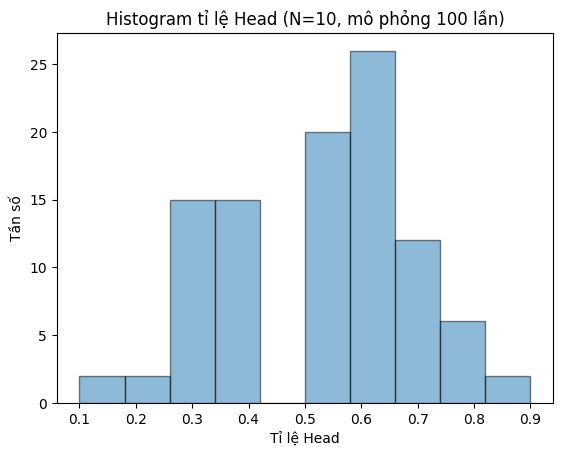

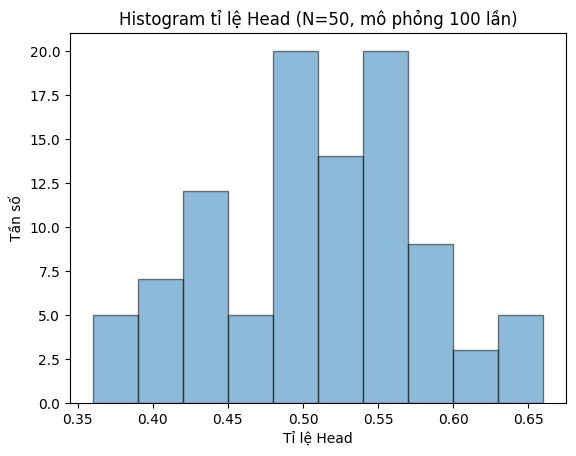

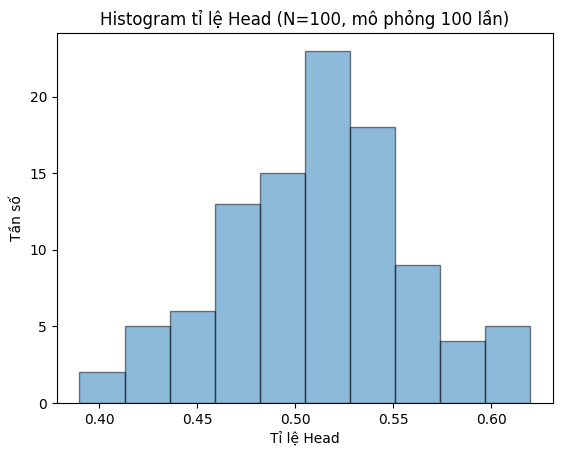

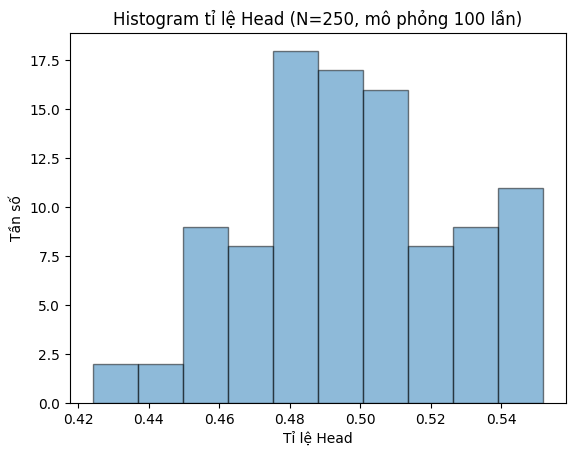

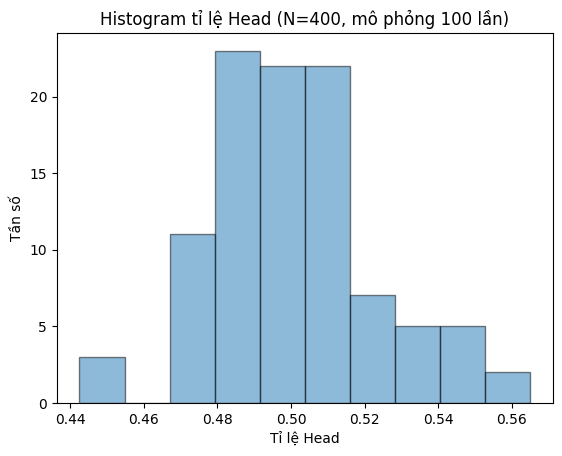

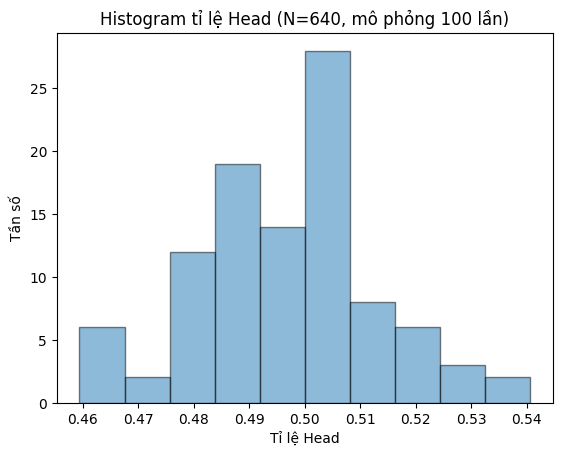

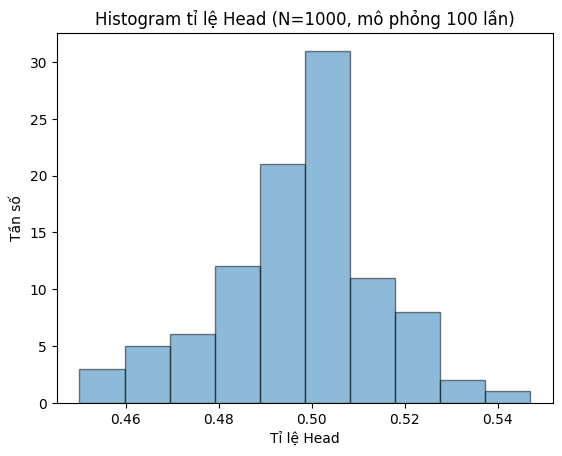

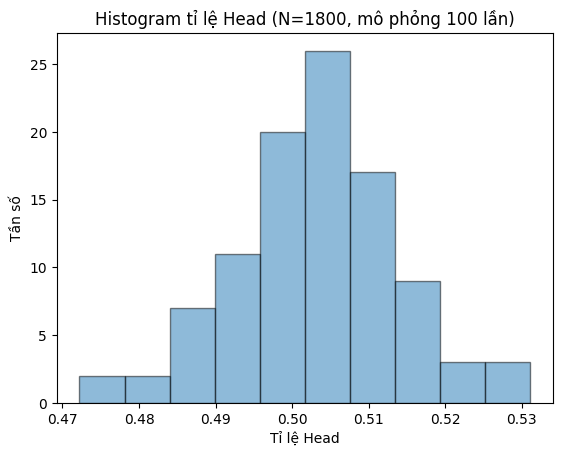

N=10 -> Trung bình tỉ lệ Head = 0.517, Độ lệch chuẩn = 0.169
N=50 -> Trung bình tỉ lệ Head = 0.506, Độ lệch chuẩn = 0.070
N=100 -> Trung bình tỉ lệ Head = 0.511, Độ lệch chuẩn = 0.047
N=250 -> Trung bình tỉ lệ Head = 0.497, Độ lệch chuẩn = 0.029
N=400 -> Trung bình tỉ lệ Head = 0.501, Độ lệch chuẩn = 0.023
N=640 -> Trung bình tỉ lệ Head = 0.497, Độ lệch chuẩn = 0.017
N=1000 -> Trung bình tỉ lệ Head = 0.497, Độ lệch chuẩn = 0.017
N=1800 -> Trung bình tỉ lệ Head = 0.503, Độ lệch chuẩn = 0.011

Nhận xét:
- Khi N nhỏ, tỉ lệ Head dao động nhiều (độ lệch chuẩn lớn).
- Khi N lớn, tỉ lệ Head xoay quanh 0.5 với độ lệch chuẩn nhỏ hơn.
- Điều này phù hợp với Định luật số lớn: kích thước mẫu càng lớn, tỉ lệ thực nghiệm càng gần 0.5.


In [27]:
import numpy as np
import matplotlib.pyplot as plt

# Danh sách các giá trị N
list_N = [10, 50, 100, 250, 400, 640, 1000, 1800]

# Số lần mô phỏng cho mỗi N
num_sim = 100  # Ví dụ mô phỏng 100 lần

# Lưu kết quả trung bình tỉ lệ Head của mỗi N
results = {}

np.random.seed(0)  # Để tái lập kết quả

for N in list_N:
    proportions = []
    for _ in range(num_sim):
        # Mô phỏng tung đồng xu N lần (giả sử xác suất ra Head = 0.5)
        flips = np.random.choice(["Head", "Tail"], size=N, p=[0.5, 0.5])
        # Tính tỉ lệ Head
        proportion_head = np.mean(flips == "Head")
        proportions.append(proportion_head)
    
    # Lưu các tỉ lệ mô phỏng vào dict để tiện truy cập
    results[N] = proportions

    # Vẽ histogram tỉ lệ Head cho N
    plt.hist(proportions, bins=10, alpha=0.5, edgecolor='black')
    plt.title(f"Histogram tỉ lệ Head (N={N}, mô phỏng {num_sim} lần)")
    plt.xlabel("Tỉ lệ Head")
    plt.ylabel("Tần số")
    plt.show()

# In nhận xét
for N in list_N:
    mean_prop = np.mean(results[N])
    std_prop = np.std(results[N], ddof=1)
    print(f"N={N} -> Trung bình tỉ lệ Head = {mean_prop:.3f}, Độ lệch chuẩn = {std_prop:.3f}")

print("\nNhận xét:")
print("- Khi N nhỏ, tỉ lệ Head dao động nhiều (độ lệch chuẩn lớn).")
print("- Khi N lớn, tỉ lệ Head xoay quanh 0.5 với độ lệch chuẩn nhỏ hơn.")
print("- Điều này phù hợp với Định luật số lớn: kích thước mẫu càng lớn, tỉ lệ thực nghiệm càng gần 0.5.")


---